In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import os
from datetime import datetime
from tqdm import tqdm

from trackml.dataset import load_event, load_dataset
from trackml.score import score_event

# import sys
# sys.stdout = open('/dev/stdout', 'w')

import warnings
warnings.filterwarnings('ignore')

In [2]:
def append_to_csv(batch, csv_file):
    props = dict(encoding='utf-8', index=False)
    if not os.path.exists(csv_file):
        batch.to_csv(csv_file, **props)
    else:
        batch.to_csv(csv_file, mode='a', header=False, **props)

def delete_file_if_exists(filename):
    if os.path.exists(filename):
        os.remove(filename)

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer0(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        

        ss = StandardScaler()
        X = ss.fit_transform(hits[['x', 'y', 'z']].values)
        
        return X
    
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        r = np.sqrt(x**2 + y**2 + z**2)
        hits['x2'] = x/r
        hits['y2'] = y/r

        r = np.sqrt(x**2 + y**2)
        hits['z2'] = z/r

        ss = StandardScaler()
        X = ss.fit_transform(hits[['x2', 'y2', 'z2']].values)
        
        return X
    
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [4]:
def preprocess(hits):
    x = hits.x.values
    y = hits.y.values
    z = hits.z.values

    r = np.sqrt(x**2 + y**2 + z**2)
    hits['x2'] = x/r
    hits['y2'] = y/r

    r = np.sqrt(x**2 + y**2)
    hits['z2'] = z/r

    rho = np.sqrt(x**2 + y**2 + z**2)
    theta = np.degrees(np.arctan2(y,x))

    phi = np.degrees(np.arctan2(r,z))

    hits['rho'] = rho
    hits['theta'] = theta
    hits['phi'] = phi

#         ss = StandardScaler()
#         X = ss.fit_transform(hits[['p', 'y2', 'z2']].values)
    X = hits[['phi', 'theta', 'rho']].values
    return X

def preprocess2(hits):
    x = hits.x.values
    y = hits.y.values
    z = hits.z.values

    r = np.sqrt(x**2 + y**2 + z**2)
    hits['x2'] = x/r
    hits['y2'] = y/r

    r = np.sqrt(x**2 + y**2)
    hits['z2'] = z/r

    rho = np.sqrt(x**2 + y**2 + z**2)
    theta = np.degrees(np.arctan2(y,x))

    phi = np.degrees(np.arctan2(r,z))

    hits['rho'] = rho
    hits['theta'] = theta
    hits['phi'] = phi

    phi = 40/180*np.pi*z*0.0005
    print('phi={}'.format(phi))
    hx = x*np.cos(-phi) - y*np.sin(-phi)
    hy = x*np.sin(-phi) + y*np.cos(-phi)
    hz = z
    
    hits['hx'] = hx
    hits['hy'] = hy
    hits['hz'] = z
    
    X = hits[['hx', 'hy', 'hz']].values
    return X

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer1(object):
    
    def __init__(self, eps):
        self.eps = eps
        self.clf = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        r = np.sqrt(x**2 + y**2 + z**2)
        hits['x2'] = x/r
        hits['y2'] = y/r

        r = np.sqrt(x**2 + y**2)
        hits['z2'] = z/r

        rho = np.sqrt(x**2 + y**2 + z**2)
        theta = np.degrees(np.arctan2(y,x))
    
        phi = np.degrees(np.arctan2(r,z))
    
        hits['rho'] = rho
        hits['theta'] = theta
        hits['phi'] = phi
        
#         ss = StandardScaler()
#         X = ss.fit_transform(hits[['p', 'y2', 'z2']].values)
        X = hits[['phi', 'theta', 'rho']].values
        return X
    
    def fit(self, hits):
        X = self._preprocess(hits)
        self.clf.fit(hits)
        
    def predict_test(self, hits):
        X_test = self._preprocess(hits)
        labels = self.clf.predict(X_test)
        
        return labels
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer2(object):
    
    def __init__(self, eps):
        self.eps = eps
        self.clf = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        r = np.sqrt(x**2 + y**2)
        hits['x2'] = r
#         hits['y2'] = y/r

#         r = np.sqrt(x**2 + y**2)
        hits['z2'] = z

#         rho = np.sqrt(x**2 + y**2 + z**2)
#         theta = np.degrees(np.arctan2(y,x))
    
#         phi = np.degrees(np.arctan2(r,z))
    
#         hits['rho'] = rho
#         hits['theta'] = theta
#         hits['phi'] = phi
        
#         ss = StandardScaler()
#         X = ss.fit_transform(hits[['p', 'y2', 'z2']].values)
        X = hits[['x2', 'z2']].values
        return X
    
    def fit(self, hits):
        X = self._preprocess(hits)
        self.clf.fit(hits)
        
    def predict_test(self, hits):
        X_test = self._preprocess(hits)
        labels = self.clf.predict(X_test)
        
        return labels
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer3(object):
    
    def __init__(self, eps):
        self.eps = eps
        self.clf = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        r = np.sqrt(x**2 + y**2)
        hits['r'] = np.log(r)
        hits['y2'] = y/r
        hits['x2'] = x/r
#         r = np.sqrt(x**2 + y**2)
        hits['z2'] = z

#         rho = np.sqrt(x**2 + y**2 + z**2)
        theta = np.arctan2(hits['y2'],hits['x2'])
        hits['theta'] = theta
#         phi = np.degrees(np.arctan2(r,z))
    
#         hits['rho'] = rho
#         hits['theta'] = theta
#         hits['phi'] = phi
        
#         ss = StandardScaler()
#         X = ss.fit_transform(hits[['p', 'y2', 'z2']].values)
        X = hits[['theta', 'r']].values
        return X
    
    def fit(self, hits):
        X = self._preprocess(hits)
        self.clf.fit(hits)
        
    def predict_test(self, hits):
        X_test = self._preprocess(hits)
        labels = self.clf.predict(X_test)
        
        return labels
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer4(object):
    
    def __init__(self, eps):
        self.eps = eps
        self.clf = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        r = np.sqrt(x**2 + y**2 + z**2)
        hits['x2'] = x/r
        hits['y2'] = y/r

        r = np.sqrt(x**2 + y**2)
        hits['z2'] = z/r + (r * 0.3 * 1)

#         rho = np.sqrt(x**2 + y**2 + z**2)
#         theta = np.degrees(np.arctan2(hits['z2'],hits['x2']))
#         hits['theta'] = theta
#         phi = np.degrees(np.arctan2(r,z))
    
#         hits['rho'] = rho
#         hits['theta'] = theta
#         hits['phi'] = phi
        
        ss = StandardScaler()
        X = ss.fit_transform(hits[['x2', 'y2', 'z2']].values)
#         X = hits[['t', 'z2']].values
        return X
    
    def fit(self, hits):
        X = self._preprocess(hits)
        self.clf.fit(hits)
        
    def predict_test(self, hits):
        X_test = self._preprocess(hits)
        labels = self.clf.predict(X_test)
        
        return labels
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer5(object):
    
    def __init__(self, eps):
        self.eps = eps
        self.clf = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        r = np.sqrt(x**2 + y**2 + z**2)
        hits['x2'] = x/r
        hits['y2'] = y/r

        r = np.sqrt(x**2 + y**2)
        hits['z2'] = z/r + (r * 0.3 * 1)

        hits['p'] = np.sqrt(hits['px']**2 + hits['py']**2 + hits['pz']**2)
        
        hits['x2'] = hits['x2'] + hits['p']
        hits['y2'] = hits['y2'] + hits['p']
        hits['z2'] = hits['z2'] + hits['p']
#         rho = np.sqrt(x**2 + y**2 + z**2)
#         theta = np.degrees(np.arctan2(hits['z2'],hits['x2']))
#         hits['theta'] = theta
#         phi = np.degrees(np.arctan2(r,z))
    
#         hits['rho'] = rho
#         hits['theta'] = theta
#         hits['phi'] = phi
        
        ss = StandardScaler()
        X = ss.fit_transform(hits[['x2', 'y2', 'z2']].values)
#         X = hits[['t', 'z2']].values
        return X
    
    def fit(self, hits):
        X = self._preprocess(hits)
        self.clf.fit(hits)
        
    def predict_test(self, hits):
        X_test = self._preprocess(hits)
        labels = self.clf.predict(X_test)
        
        return labels
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [6]:
def create_one_event_submission(event_id, hits, labels):
    sub_data = np.column_stack(([event_id]*len(hits), hits.hit_id.values, labels))
    submission = pd.DataFrame(data=sub_data, columns=["event_id", "hit_id", "track_id"]).astype(int)
    return submission

In [14]:
# this scores 0.2078 on the public LB
path_to_test = "../data/test"
test_dataset_submissions = []

create_submission = True # True for submission 

if create_submission:
    for event_id, hits, cells in load_dataset(path_to_test, parts=['hits', 'cells']):

        # Track pattern recognition
        model = Clusterer(eps=0.008)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        test_dataset_submissions.append(one_submission)
        
        print('Event ID: ', event_id)

    # Create submission file
    submussion = pd.concat(test_dataset_submissions, axis=0)
    IDENTIFIER = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    submussion.to_csv('../submissions/sub-DBSCAN-sample-{}.csv.gz'.format(IDENTIFIER), index=False, compression='gzip')

Event ID:  0
Event ID:  1
Event ID:  2
Event ID:  3
Event ID:  4
Event ID:  5
Event ID:  6
Event ID:  7
Event ID:  8
Event ID:  9
Event ID:  10
Event ID:  11
Event ID:  12
Event ID:  13
Event ID:  14
Event ID:  15
Event ID:  16
Event ID:  17
Event ID:  18
Event ID:  19
Event ID:  20
Event ID:  21
Event ID:  22
Event ID:  23
Event ID:  24
Event ID:  25
Event ID:  26
Event ID:  27
Event ID:  28
Event ID:  29
Event ID:  30
Event ID:  31
Event ID:  32
Event ID:  33
Event ID:  34
Event ID:  35
Event ID:  36
Event ID:  37
Event ID:  38
Event ID:  39
Event ID:  40
Event ID:  41
Event ID:  42
Event ID:  43
Event ID:  44
Event ID:  45
Event ID:  46
Event ID:  47
Event ID:  48
Event ID:  49
Event ID:  50
Event ID:  51
Event ID:  52
Event ID:  53
Event ID:  54
Event ID:  55
Event ID:  56
Event ID:  57
Event ID:  58
Event ID:  59
Event ID:  60
Event ID:  61
Event ID:  62
Event ID:  63
Event ID:  64
Event ID:  65
Event ID:  66
Event ID:  67
Event ID:  68
Event ID:  69
Event ID:  70
Event ID:  71
Ev

In [16]:
path_to_train = "../data/train_100_events"
train_sample_scores = []

for event_id, hits, cells, particles, truth in load_dataset(path_to_train):

    # Track pattern recognition
    model = Clusterer(eps=0.008)
    labels = model.predict(hits)

    # Prepare submission for an event
    one_submission = create_one_event_submission(event_id, hits, labels)
    score = score_event(truth, one_submission)

    train_sample_scores.append(score)

#     print("Score for event %d: %.3f" % (event_id, score))

#     print('Event ID: {}, Score: {}'.format(event_id, score))
print('Mean score: %.3f' % (np.mean(train_sample_scores)))

Event ID: 1000, Score: 0.1988556913647304
Event ID: 1001, Score: 0.2041585884317101
Event ID: 1002, Score: 0.18318435313069215
Event ID: 1003, Score: 0.21273428168683847
Event ID: 1004, Score: 0.19506492906816675
Event ID: 1005, Score: 0.19742897826381522
Event ID: 1006, Score: 0.19686337989951777
Event ID: 1007, Score: 0.2044755523190459
Event ID: 1008, Score: 0.20589788785782545
Event ID: 1009, Score: 0.20768824783976925
Event ID: 1010, Score: 0.20025412138170395
Event ID: 1011, Score: 0.19694834768548108
Event ID: 1012, Score: 0.2111250609405797
Event ID: 1013, Score: 0.21081737736211192
Event ID: 1014, Score: 0.18935862442764448
Event ID: 1015, Score: 0.19712979797213848
Event ID: 1016, Score: 0.20185737963029127
Event ID: 1017, Score: 0.18970268605903584
Event ID: 1018, Score: 0.21665023512426124
Event ID: 1019, Score: 0.18462860835130326
Event ID: 1020, Score: 0.21833513864549936
Event ID: 1021, Score: 0.1999660563467387
Event ID: 1022, Score: 0.20446955745160267
Event ID: 1023, 

NameError: name 'dataset_scores' is not defined

In [17]:
print('Mean score: %.3f' % (np.mean(train_sample_scores)))

Mean score: 0.204


In [26]:
path_to_train = "../data/train_100_events"


for eps in [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):

        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.3f}, Mean score: {1:.4f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.001, Mean score: 0.0363
eps: 0.002, Mean score: 0.1014
eps: 0.003, Mean score: 0.1469
eps: 0.004, Mean score: 0.1753
eps: 0.005, Mean score: 0.1924
eps: 0.006, Mean score: 0.2015
eps: 0.007, Mean score: 0.2050
eps: 0.008, Mean score: 0.2041
eps: 0.009, Mean score: 0.1993
eps: 0.100, Mean score: 0.0001


In [30]:
eps = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.1]
mean = [0.0363, 0.1014, 0.1469, 0.1753,0.1924, 0.2015, 0.2050, 0.2041, 0.1993, 0.0001]

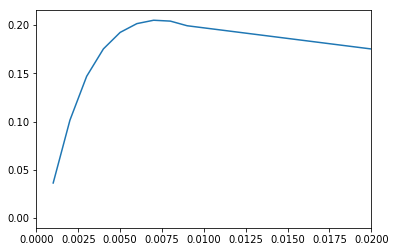

In [38]:
plt.plot(eps, mean)
plt.xlim(0.0, 0.02)
plt.show()

In [41]:
# this scores 0.2079 on the public LB
path_to_test = "../data/test"
test_dataset_submissions = []

create_submission = True # True for submission 

if create_submission:
    for event_id, hits, cells in load_dataset(path_to_test, parts=['hits', 'cells']):

        # Track pattern recognition
        model = Clusterer(eps=0.007)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        test_dataset_submissions.append(one_submission)
        
        print('Event ID: ', event_id)

    # Create submission file
    submussion = pd.concat(test_dataset_submissions, axis=0)
    IDENTIFIER = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    submussion.to_csv('../submissions/sub-DBSCAN-sample-{}.csv.gz'.format(IDENTIFIER), index=False, compression='gzip')

Event ID:  0
Event ID:  1
Event ID:  2
Event ID:  3
Event ID:  4
Event ID:  5
Event ID:  6
Event ID:  7
Event ID:  8
Event ID:  9
Event ID:  10
Event ID:  11
Event ID:  12
Event ID:  13
Event ID:  14
Event ID:  15
Event ID:  16
Event ID:  17
Event ID:  18
Event ID:  19
Event ID:  20
Event ID:  21
Event ID:  22
Event ID:  23
Event ID:  24
Event ID:  25
Event ID:  26
Event ID:  27
Event ID:  28
Event ID:  29
Event ID:  30
Event ID:  31
Event ID:  32
Event ID:  33
Event ID:  34
Event ID:  35
Event ID:  36
Event ID:  37
Event ID:  38
Event ID:  39
Event ID:  40
Event ID:  41
Event ID:  42
Event ID:  43
Event ID:  44
Event ID:  45
Event ID:  46
Event ID:  47
Event ID:  48
Event ID:  49
Event ID:  50
Event ID:  51
Event ID:  52
Event ID:  53
Event ID:  54
Event ID:  55
Event ID:  56
Event ID:  57
Event ID:  58
Event ID:  59
Event ID:  60
Event ID:  61
Event ID:  62
Event ID:  63
Event ID:  64
Event ID:  65
Event ID:  66
Event ID:  67
Event ID:  68
Event ID:  69
Event ID:  70
Event ID:  71
Ev

In [43]:
path_to_train = "../data/train_100_events"


for eps in [0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):

        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.6f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0061, Mean score: 0.2020
eps: 0.0062, Mean score: 0.2026
eps: 0.0063, Mean score: 0.2031
eps: 0.0064, Mean score: 0.2035
eps: 0.0065, Mean score: 0.2039
eps: 0.0066, Mean score: 0.2041
eps: 0.0067, Mean score: 0.2045
eps: 0.0068, Mean score: 0.2048
eps: 0.0069, Mean score: 0.2049
eps: 0.0070, Mean score: 0.2050
eps: 0.0071, Mean score: 0.2051
eps: 0.0072, Mean score: 0.2052
eps: 0.0073, Mean score: 0.2052
eps: 0.0074, Mean score: 0.2052
eps: 0.0075, Mean score: 0.2050


In [44]:
path_to_train = "../data/train_100_events"


for eps in [0.0072, 0.0073, 0.0074]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):

        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0072, Mean score: 0.20521408
eps: 0.0073, Mean score: 0.20519609
eps: 0.0074, Mean score: 0.20521875


In [45]:
path_to_train = "../data/train_100_events"
event_prefix = "event000001000"
hits, cells, particles, truth = load_event(os.path.join(path_to_train, event_prefix))

In [50]:
print(hits.head())
print(hits.shape)
print(cells.head())
print(cells.shape)
print(particles.head())
print(particles.shape)
print(truth.head())
print(truth.shape)

   hit_id          x         y       z  volume_id  layer_id  module_id
0       1 -64.409897 -7.163700 -1502.5          7         2          1
1       2 -55.336102  0.635342 -1502.5          7         2          1
2       3 -83.830498 -1.143010 -1502.5          7         2          1
3       4 -96.109100 -8.241030 -1502.5          7         2          1
4       5 -62.673599 -9.371200 -1502.5          7         2          1
(120939, 7)
   hit_id  ch0  ch1     value
0       1  209  617  0.013832
1       1  210  617  0.079887
2       1  209  618  0.211723
3       2   68  446  0.334087
4       3   58  954  0.034005
(664996, 4)
        particle_id        vx        vy        vz         px         py  \
0  4503668346847232 -0.009288  0.009861 -0.077879  -0.055269   0.323272   
1  4503737066323968 -0.009288  0.009861 -0.077879  -0.948125   0.470892   
2  4503805785800704 -0.009288  0.009861 -0.077879  -0.886484   0.105749   
3  4503874505277440 -0.009288  0.009861 -0.077879   0.257539  -0.67671

In [52]:
truth1 = pd.merge(truth, particles, how='left', on='particle_id')

In [53]:
truth1.shape

(120939, 17)

In [54]:
truth1.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010,-0.015802,0.006381,1.16279,-0.569670,-0.011187,-15.49600,1.0,10.0
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008,-0.000486,-0.015051,5.75865,-0.240629,0.012071,-3.70766,-1.0,11.0
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009,0.018366,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0


In [56]:
truth2 = truth1.dropna()

In [57]:
truth2.shape

(103305, 17)

In [60]:
hits1 = pd.merge(hits, truth1, how='left', on='hit_id')

In [61]:
hits1.shape

(120939, 23)

In [62]:
hits1.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
0,1,-64.409897,-7.163700,-1502.5,7,2,1,0,-64.411598,-7.164120,...,-956385.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,-55.336102,0.635342,-1502.5,7,2,1,22525763437723648,-55.338501,0.630805,...,-15.49220,0.000010,-0.015802,0.006381,1.16279,-0.569670,-0.011187,-15.49600,1.0,10.0
2,3,-83.830498,-1.143010,-1502.5,7,2,1,0,-83.828003,-1.145580,...,-760877.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,-96.109100,-8.241030,-1502.5,7,2,1,297237712845406208,-96.122902,-8.230360,...,-3.70232,0.000008,-0.000486,-0.015051,5.75865,-0.240629,0.012071,-3.70766,-1.0,11.0
4,5,-62.673599,-9.371200,-1502.5,7,2,1,418835796137607168,-62.659401,-9.375040,...,-6.57318,0.000009,0.018366,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0


In [68]:
path_to_train = "../data/train_100_events"


for eps in [0.0072, 0.0073, 0.0074]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):
        
        truth1 = pd.merge(truth, particles, how='left', on='particle_id')
        hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
        
        hits2 = hits1.dropna()
        truth2 = truth1.dropna()
        
        hits3 = hits2[hits2.nhits > 3]
        truth3 = truth2[truth2.nhits > 3]
        
        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits3)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits3, labels)
        score = score_event(truth3, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0072, Mean score: 0.20551536
eps: 0.0073, Mean score: 0.20562315
eps: 0.0074, Mean score: 0.20572021


In [70]:
# path_to_train = "../data/train_100_events"


# for eps in [0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.009]:
#     train_sample_scores = []
#     for event_id, hits, cells, particles, truth in load_dataset(path_to_train):
        
#         truth1 = pd.merge(truth, particles, how='left', on='particle_id')
#         hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
        
#         hits2 = hits1.dropna()
#         truth2 = truth1.dropna()
        
#         hits3 = hits2[hits2.nhits > 3]
#         truth3 = truth2[truth2.nhits > 3]
        
#         # Track pattern recognition
#         model = Clusterer(eps=eps)
#         labels = model.predict(hits3)

#         # Prepare submission for an event
#         one_submission = create_one_event_submission(event_id, hits3, labels)
#         score = score_event(truth3, one_submission)

#         train_sample_scores.append(score)

#     #     print("Score for event %d: %.3f" % (event_id, score))

#     #     print('Event ID: {}, Score: {}'.format(event_id, score))
#     print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

# eps: 0.0075, Mean score: 0.20580227
# eps: 0.0076, Mean score: 0.20572321
# eps: 0.0077, Mean score: 0.20564800
# eps: 0.0078, Mean score: 0.20545296

In [6]:
path_to_train = "../data/train"

eps = 0.0075
model = Clusterer1(eps=eps)
train_hits = pd.DataFrame()
train_sample_scores = []
path1 = '../cache/train_hits.csv'
delete_file_if_exists(path1)

path2 = '../cache/train_truth.csv'
delete_file_if_exists(path2)


index = 0   

for event_id, hits, cells, particles, truth in tqdm(load_dataset(path_to_train)):

#     if index > 2:
#         continue
    truth1 = pd.merge(truth, particles, how='left', on='particle_id')
    hits1 = pd.merge(hits, truth1, how='left', on='hit_id')

    hits2 = hits1.dropna()
    truth2 = truth1.dropna()

    hits3 = hits2[hits2.nhits > 3]
    truth3 = truth2[truth2.nhits > 3]

#     train_hits = train_hits.append(hits3)
#     model.fit(hits3)
#     h_str = '{},{},{},{}'.format(hits3['hit_id'], hits3['x'], hits3['y'], hits3['z'])
#     f_sub.write(h_str)
    append_to_csv(hits3, path1)
    append_to_csv(truth3, path2)
    del hits1, truth1
    del hits2, truth2
    del hits3, truth3
    
#     index += 1


8850it [8:46:27,  3.57s/it]


In [8]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,234187730379079680,-92.607300,-9.69752,-1502.5,-0.474275,-0.072597,-7.786300,0.000009
1,2,58547344911630336,-59.222500,-6.30752,-1502.5,-0.307018,-0.013564,-7.627760,0.000009
2,3,292738030228209664,-64.652702,-4.37456,-1502.5,-0.475818,-0.055669,-11.139000,0.000009
3,4,162131716889116672,-79.332497,-2.14563,-1502.5,-0.252884,0.015283,-4.698420,0.000007
4,5,639511765561901056,-96.078400,-2.77971,-1502.5,1.461010,-0.012697,-16.690901,0.000026


In [10]:
t1 = truth[truth.particle_id == 234187730379079680]

In [11]:
t1.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,234187730379079680,-92.607300,-9.69752,-1502.5,-0.474275,-0.072597,-7.78630,0.000009
1312,1313,234187730379079680,-80.443901,-7.86429,-1302.5,-0.474608,-0.067781,-7.78686,0.000008
2859,2860,234187730379079680,-68.248199,-6.18218,-1102.5,-0.475746,-0.061824,-7.78735,0.000006
4723,4724,234187730379079680,-59.642200,-5.09595,-962.5,-0.479315,-0.057821,-7.78765,0.000004
6846,6847,234187730379079680,-51.050900,-4.10536,-822.5,-0.478390,-0.052489,-7.78835,0.000004


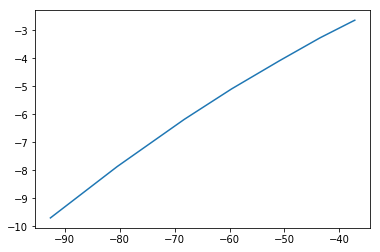

In [12]:
plt.plot(t1.tx, t1.ty)

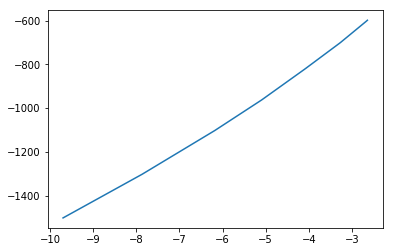

In [13]:
plt.plot(t1.ty, t1.tz)

In [14]:
truth1 = pd.merge(truth, particles, how='left', on='particle_id')
hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
hits2 = hits1.dropna()
truth2 = truth1.dropna()

hits3 = hits2[hits2.nhits > 3]
truth3 = truth2[truth2.nhits > 3]

In [47]:
hits3.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
0,1,-92.607201,-9.72084,-1502.5,7,2,1,234187730379079680,-92.607300,-9.69752,...,-7.786300,0.000009,0.005128,-0.006609,5.102500,-0.482091,-0.023566,-7.790760,-1.0,13.0
1,2,-59.236500,-6.29204,-1502.5,7,2,1,58547344911630336,-59.222500,-6.30752,...,-7.627760,0.000009,0.019036,-0.021448,-0.937554,-0.297197,-0.050320,-7.631350,1.0,12.0
2,3,-64.647797,-4.36065,-1502.5,7,2,1,292738030228209664,-64.652702,-4.37456,...,-11.139000,0.000009,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144000,-1.0,12.0
3,4,-79.322304,-2.15520,-1502.5,7,2,1,162131716889116672,-79.332497,-2.14563,...,-4.698420,0.000007,0.008557,-0.005577,-7.752250,-0.246333,-0.028793,-4.703310,1.0,17.0
4,5,-96.088097,-2.77253,-1502.5,7,2,1,639511765561901056,-96.078400,-2.77971,...,-16.690901,0.000026,-0.020732,0.001791,-0.068283,-1.459800,-0.068244,-16.698999,1.0,11.0


In [43]:
event_id

9999

In [49]:
sub = create_one_event_submission(9999, hits3, hits3.particle_id.values)

In [50]:
sub.head()

,event_id,hit_id,track_id
0,9999,1,234187730379079680
1,9999,2,58547344911630336
2,9999,3,292738030228209664
3,9999,4,162131716889116672
4,9999,5,639511765561901056


In [51]:
score_event(truth3, sub)

0.9999999466106115

In [52]:
h4 = hits3[hits3.particle_id == 292738030228209664]

In [53]:
h4.shape

(12, 23)

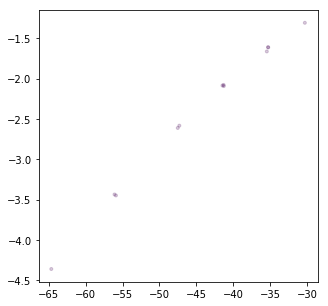

In [55]:
fig = plt.figure(figsize=(5,5))
plt.scatter(h4.x, h4.y, marker='.', alpha=0.2, c=h4.volume_id)
plt.show()

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('precision', 6)
h4

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
2,3,-64.647797,-4.36065,-1502.5,7,2,1,292738030228209664,-64.652702,-4.37456,-1502.5,-0.475818,-0.055669,-11.1390,0.000009,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
1323,1324,-56.087700,-3.43618,-1302.5,7,4,1,292738030228209664,-56.092201,-3.44951,-1302.5,-0.477625,-0.048795,-11.1395,0.000008,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
2802,2803,-55.896000,-3.44859,-1297.5,7,4,106,292738030228209664,-55.877800,-3.42754,-1297.5,-0.477426,-0.048897,-11.1400,0.000006,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
2867,2868,-47.519699,-2.61140,-1102.5,7,6,1,292738030228209664,-47.504299,-2.61639,-1102.5,-0.479022,-0.043696,-11.1400,0.000005,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
4648,4649,-47.307899,-2.58279,-1097.5,7,6,106,292738030228209664,-47.289398,-2.59716,-1097.5,-0.478599,-0.042730,-11.1418,0.000005,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
4713,4714,-41.470901,-2.08519,-962.5,7,8,1,292738030228209664,-41.488400,-2.10412,-962.5,-0.479144,-0.038864,-11.1418,0.000005,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
4751,4752,-41.316002,-2.07742,-958.0,7,8,4,292738030228209664,-41.294998,-2.08877,-958.0,-0.478131,-0.038031,-11.1425,0.000006,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
6808,6809,-41.288300,-2.09201,-957.5,7,8,106,292738030228209664,-41.273602,-2.08707,-957.5,-0.478097,-0.037861,-11.1425,0.000008,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
6855,6856,-35.463299,-1.66254,-822.5,7,10,1,292738030228209664,-35.473202,-1.64387,-822.5,-0.479077,-0.034766,-11.1425,0.000009,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0
6952,6953,-35.296398,-1.60936,-818.0,7,10,4,292738030228209664,-35.279800,-1.62989,-818.0,-0.478562,-0.033749,-11.1431,0.000011,-0.007856,-0.019917,-0.738022,-0.482342,-0.011143,-11.144,-1.0,12.0


In [26]:
hits3.volume_id.nunique()


9

In [28]:
hits3.layer_id.nunique()


7

In [29]:
hits3.module_id.nunique()

2573

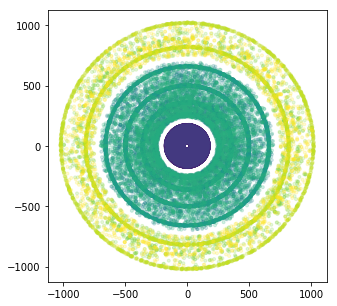

In [67]:
fig = plt.figure(figsize=(5,5))
plt.scatter(hits3.x, hits3.y, marker='.', alpha=0.2, c=hits3.volume_id)
plt.show()

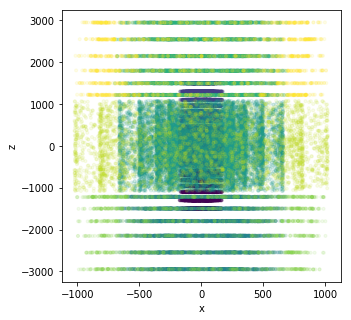

In [68]:
fig = plt.figure(figsize=(5,5))
plt.scatter(hits3.x,hits3.z,marker='.',alpha=0.1,c=hits3.volume_id)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

In [69]:
hits3.shape

(84068, 23)

In [70]:
hits3.particle_id.nunique()

7637

In [71]:
particles = list(set(hits3.particle_id.values))

In [73]:
n = 0
for index, particle_id in enumerate(particles):
    df = hits3[hits3.particle_id == particle_id]
    if df.volume_id.nunique() > 1:
        n += 1
        print(particle_id, df.volume_id.nunique())

In [74]:
n

6076

In [75]:
h5 = hits3[hits3.particle_id == 495398501631393792]

In [76]:
h5.shape

(15, 23)

In [77]:
h5

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
13543,13544,118.647003,107.069000,-598.000000,7,14,67,495398501631393792,118.649002,107.066002,-598.000000,1.40282,1.20402,-6.94574,0.000023,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
13611,13612,119.458000,107.755997,-602.000000,7,14,69,495398501631393792,119.457001,107.759003,-602.000000,1.40184,1.20228,-6.94568,0.000020,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
16225,16226,22.939301,21.512899,-116.303001,8,2,90,495398501631393792,22.932899,21.520100,-116.290001,1.35809,1.26316,-6.94642,0.000040,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
16272,16273,24.581800,23.053699,-124.716003,8,2,91,495398501631393792,24.582500,23.053400,-124.724998,1.35946,1.26166,-6.94637,0.000035,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
23057,23058,52.254002,48.469299,-265.595001,8,4,116,495398501631393792,52.255299,48.468201,-265.588989,1.37179,1.24494,-6.94646,0.000031,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
28541,28542,86.404900,79.035896,-437.596008,8,6,33,495398501631393792,86.404297,79.036301,-437.596985,1.38852,1.22387,-6.94615,0.000026,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
55090,55091,535.434021,415.829010,-2548.500000,12,4,104,495398501631393792,535.546997,415.933990,-2548.500000,1.52619,1.03488,-6.93995,0.000019,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
56173,56174,447.778992,356.273987,-2148.500000,12,6,104,495398501631393792,447.542999,356.112000,-2148.500000,1.52207,1.04389,-6.94110,0.000014,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
57289,57290,372.450012,303.873993,-1804.500000,12,8,105,495398501631393792,372.403015,303.848999,-1804.500000,1.50788,1.06784,-6.94064,0.000012,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0
58496,58497,307.825012,257.333008,-1504.500000,12,10,105,495398501631393792,307.608002,257.136993,-1504.500000,1.48924,1.09543,-6.94132,0.000012,0.016098,0.006836,1.3915,1.34664,1.27675,-6.94641,1.0,15.0


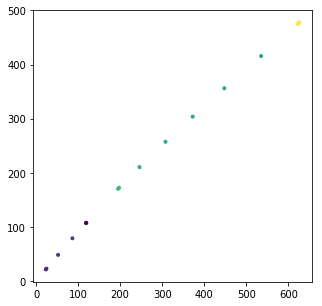

In [80]:
fig = plt.figure(figsize=(5,5))
plt.scatter(h5.x, h5.y, marker='.', alpha=0.9, c=h5.volume_id)
plt.show()

In [ ]:
for event_id, hits, cells, particles, truth in tqdm(load_dataset(path_to_train)):

#     if index > 2:
#         continue
    truth1 = pd.merge(truth, particles, how='left', on='particle_id')
    hits1 = pd.merge(hits, truth1, how='left', on='hit_id')

    hits2 = hits1.dropna()
    truth2 = truth1.dropna()

    hits3 = hits2[hits2.nhits > 3]
    truth3 = truth2[truth2.nhits > 3]

    

In [10]:
path_to_train = "../data/train"
event_prefix = "event000001000"
hits, cells, particles, truth = load_event(os.path.join(path_to_train, event_prefix))

In [11]:
#     @Heng CherKeng: https://www.kaggle.com/c/trackml-particle-identification/discussion/57180
truth = pd.merge(truth, particles, how='left', on='particle_id')
hits = pd.merge(hits, truth, how='left', on='hit_id')

# hits = hits.dropna()
# truth = truth.dropna()

# hits = hits[hits2.nhits > 3]
# truth = truth[truth2.nhits > 3]
print(hits.head())

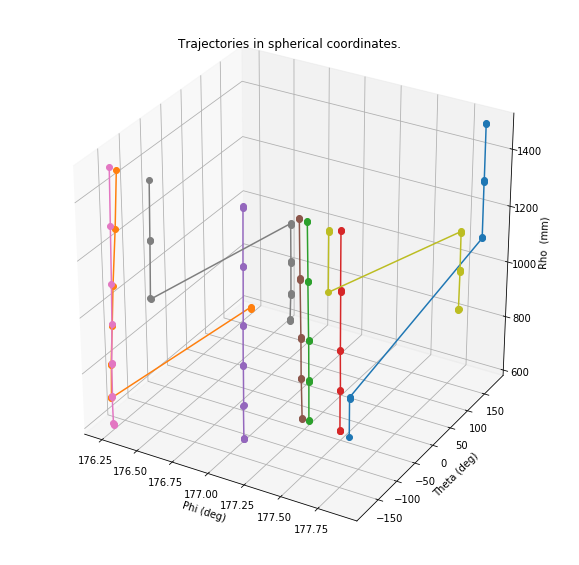

In [91]:
df = pd.DataFrame()
particle_ids = list(hits.particle_id.unique())
part_list = []
for j, particle_id in enumerate(particle_ids):
    if particle_id == 0:
        continue
    if j >= 10:
        continue
    xyz_t = hits.loc[hits.particle_id == particle_id].as_matrix(columns=['x','y', 'z']).T
    
    print('==========================')
    print(particle_id)
    print(xyz_t.shape)
    x, y, z = xyz_t[0], xyz_t[1], xyz_t[2]
    r = np.sqrt(x**2 + y**2)
    print(r)
    rho = np.sqrt(x**2 + y**2 + z**2)
    print(rho)
    rho = np.linalg.norm(xyz_t, axis=0)
    print(rho)
    theta = np.degrees(np.arctan2(y,x))
    print(theta)
    
    phi = np.degrees(np.arctan2(r,z))
    print(phi)
    phi = np.degrees(np.arccos(z/rho))
    print(phi)
    
    part_list.append([particle_id,x,y,z,rho,theta,phi])
#     df = pd.DataFrame(xyz_t.T, columns=['x', 'y', 'z'])
   
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for particle in part_list: 
    ax.plot(
        xs=particle[6],
        ys=particle[5],
        zs=particle[4],
        marker='o')
ax.set_xlabel('Phi (deg)')
ax.set_ylabel('Theta (deg)')
ax.set_zlabel('Rho  (mm)')
plt.title('Trajectories in spherical coordinates.')
plt.show()

In [31]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
0,1,-64.409897,-7.163700,-1502.5,7,2,1,0,-64.411598,-7.164120,...,-956385.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,-55.336102,0.635342,-1502.5,7,2,1,22525763437723648,-55.338501,0.630805,...,-15.49220,0.000010,-0.015802,0.006381,1.16279,-0.569670,-0.011187,-15.49600,1.0,10.0
2,3,-83.830498,-1.143010,-1502.5,7,2,1,0,-83.828003,-1.145580,...,-760877.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,-96.109100,-8.241030,-1502.5,7,2,1,297237712845406208,-96.122902,-8.230360,...,-3.70232,0.000008,-0.000486,-0.015051,5.75865,-0.240629,0.012071,-3.70766,-1.0,11.0
4,5,-62.673599,-9.371200,-1502.5,7,2,1,418835796137607168,-62.659401,-9.375040,...,-6.57318,0.000009,0.018366,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0


In [74]:
xyz_t

array([[-5.53361e+01,  6.35342e-01, -1.50250e+03],
       [-5.51622e+01,  6.04841e-01, -1.49750e+03],
       [-4.79755e+01,  3.11848e-01, -1.30250e+03],
       [-4.78123e+01,  3.27322e-01, -1.29750e+03],
       [-4.06228e+01,  8.80464e-02, -1.10250e+03],
       [-4.04388e+01,  9.80977e-02, -1.09750e+03],
       [-3.54806e+01, -8.79969e-03, -9.62500e+02],
       [-3.53301e+01, -2.32938e-02, -9.58000e+02],
       [-3.53123e+01, -4.43987e-03, -9.57500e+02],
       [-3.03337e+01, -1.05277e-01, -8.22500e+02]], dtype=float32)

In [73]:
np.linalg.norm([-55.336102, 0.635342, -1502.5])

1503.518785331268

In [22]:
x

array([ -64.4099,  -83.8305,  -42.6239, ..., -862.252 , -863.083 ,
       -775.006 ], dtype=float32)

In [16]:
xyz_t.shape

(3, 17634)

In [14]:
xyz_t

array([[-6.44099e+01, -7.16370e+00, -1.50250e+03],
       [-8.38305e+01, -1.14301e+00, -1.50250e+03],
       [-4.26239e+01, -1.06612e+01, -1.50250e+03],
       ...,
       [-8.62252e+02,  2.62281e+02,  2.94450e+03],
       [-8.63083e+02,  2.25235e+02,  2.95550e+03],
       [-7.75006e+02,  4.05747e+01,  2.94450e+03]], dtype=float32)

In [6]:
path_to_train = "../data/train_100_events"


for eps in [0.0075]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):
        
        truth = pd.merge(truth, particles, how='left', on='particle_id')
        hits = pd.merge(hits, truth, how='left', on='hit_id')
        
#         hits2 = hits1.dropna()
#         truth2 = truth1.dropna()
        
#         hits3 = hits2[hits2.nhits > 3]
#         truth3 = truth2[truth2.nhits > 3]
        
        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0075, Mean score: 0.20503095


In [10]:
path_to_train = "../data/train_100_events"


for eps in [0.0075]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):
        
        truth = pd.merge(truth, particles, how='left', on='particle_id')
        hits = pd.merge(hits, truth, how='left', on='hit_id')
        
#         hits2 = hits1.dropna()
#         truth2 = truth1.dropna()
        
#         hits3 = hits2[hits2.nhits > 3]
#         truth3 = truth2[truth2.nhits > 3]
        
        # Track pattern recognition
        model = Clusterer1(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0075, Mean score: 0.00000000


In [7]:
import glob, hdbscan
l = ['arccos', 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'cosine', 'dice', 'euclidean', 'hamming',
    'haversine', 'infinity', 'jaccard', 'kulsinski', 'l1', 'l2', 'mahalanobis', 'manhattan',
    'matching', 'minkowski', 'p', 'pyfunc', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener',
    'sokalsneath', 'wminknowski']

train = np.unique([p.split('-')[0] for p in sorted(glob.glob('../data/train/**'))])
test = np.unique([p.split('-')[0] for p in sorted(glob.glob('../data/test/**'))])

In [ ]:
scores = []
for e in train:
    hits, cells, truth = load_event(e, parts=['hits', 'cells', 'truth'])
    hits['event_id'] = int(e[-9:])
#     hits = norm_points(hits)
    for m in l: #Tuning/Grid Search
        print(m)
        if m in ['arccos', 'cosine', 'dice', 'haversine', 'hamming', 'euclidean', 'jaccard']:
            continue
        try:
#             dbscan = hdbscan.HDBSCAN(min_samples=4, min_cluster_size=7, cluster_selection_method='leaf', prediction_data=False, metric=m)
            X = preprocess(hits)
        
            cl = DBSCAN(eps=0.0075, min_samples=1, algorithm='auto', metric=m)
            labels = cl.fit_predict(X)
            hits['track_id'] = labels
            score = score_event(truth, hits[['event_id','hit_id','track_id']])
            print(m, len(truth['particle_id'].unique()), len(hits['track_id'].unique()), score)
            scores.append([score, m])
        except e:
            print("ERROR:", m)
#             continue
#         break #Remove to test all
    break #Remove to test more samples
print(sorted(scores, reverse=True))

arccos
braycurtis
braycurtis 10566 13947 0.00011208246709924112
canberra
canberra 10566 86278 0.000710276217931698
chebyshev
chebyshev 10566 120867 0.0
cityblock
cityblock 10566 120889 0.0
cosine
dice
euclidean
hamming
haversine
infinity
infinity 10566 120867 0.0
jaccard


In [ ]:
scores = []
for eps in [0.008, 0.009, 0.01, 0.1, 0.2, 0.9, 1.0]:
    for e in train:
        hits, cells, truth = load_event(e, parts=['hits', 'cells', 'truth'])
        hits['event_id'] = int(e[-9:])
    #     hits = norm_points(hits)

        for m in ['braycurtis', 'canberra']: #Tuning/Grid Search
            print(m)
    #         if m in ['arccos', 'cosine', 'dice', 'haversine', 'hamming', 'euclidean', 'jaccard']:
    #             continue
            try:
    #             dbscan = hdbscan.HDBSCAN(min_samples=4, min_cluster_size=7, cluster_selection_method='leaf', prediction_data=False, metric=m)
                X = preprocess(hits)

                cl = DBSCAN(eps=eps, min_samples=1, algorithm='auto', metric=m)
                labels = cl.fit_predict(X)
                hits['track_id'] = labels
                score = score_event(truth, hits[['event_id','hit_id','track_id']])
                print(m, len(truth['particle_id'].unique()), len(hits['track_id'].unique()), score)
                scores.append([score, m])
            except e:
                print("ERROR:", m)
    #             continue
    #         break #Remove to test all
        break #Remove to test more samples
print(sorted(scores, reverse=True))

braycurtis
braycurtis 10566 12030 0.00011208246709924112
canberra
canberra 10566 84545 0.000655639214499362
braycurtis
braycurtis 10566 8899 0.00011208246709924112
canberra
canberra 10566 80862 0.0006628479645227382
braycurtis
braycurtis 10566 6541 5.744546366690511e-05
canberra
canberra 10566 77409 0.0005737033585303136
braycurtis
braycurtis 10566 1 0.0
canberra
canberra 10566 2311 0.0010614103167068483
braycurtis
braycurtis 10566 1 0.0
canberra
canberra 10566 461 0.000914200882028189
braycurtis


In [11]:
scores = []
for e in train:
    hits, cells, truth = load_event(e, parts=['hits', 'cells', 'truth'])
    hits['event_id'] = int(e[-9:])
#     hits = norm_points(hits)
    for m in l: #Tuning/Grid Search
        print(m)
#         if m in ['arccos', 'cosine', 'dice', 'haversine', 'hamming', 'euclidean', 'jaccard']:
#             continue
        try:
#             dbscan = hdbscan.HDBSCAN(min_samples=4, min_cluster_size=7, cluster_selection_method='leaf', prediction_data=False, metric=m)
            X = preprocess2(hits)
        
            cl = DBSCAN(eps=0.0075, min_samples=1, algorithm='auto', metric=m)
            labels = cl.fit_predict(X)
            hits['track_id'] = labels
            score = score_event(truth, hits[['event_id','hit_id','track_id']])
            print(m, len(truth['particle_id'].unique()), len(hits['track_id'].unique()), score)
            scores.append([score, m])
        except:
            print("ERROR:", m)
#             continue
#         break #Remove to test all
    break #Remove to test more samples
print(sorted(scores, reverse=True))

arccos
ERROR: arccos
braycurtis
braycurtis 10566 60586 0.0
canberra
canberra 10566 112702 0.0001679899378444939
chebyshev
chebyshev 10566 120899 0.0
cityblock
cityblock 10566 120904 0.0
cosine
cosine 10566 1 0.0
dice


KeyboardInterrupt: 

In [24]:
scores = []
for e in train:
    hits, cells, truth, particles = load_event(e, parts=['hits', 'cells', 'truth', 'particles'])
    hits['event_id'] = int(e[-9:])
    print(e)
#     hits = norm_points(hits)
    for m in ['euclidean']: #Tuning/Grid Search
        print(m)
#         if m in ['arccos', 'cosine', 'dice', 'haversine', 'hamming', 'euclidean', 'jaccard']:
#             continue
        try:
            truth = pd.merge(truth, particles, how='left', on='particle_id')
            hits = pd.merge(hits, truth, how='left', on='hit_id')
            hits.sort_values(['particle_id','z'],inplace=True)
            cl = hdbscan.HDBSCAN(min_samples=1, min_cluster_size=7, cluster_selection_method='leaf', prediction_data=False, metric=m)
            X = preprocess2(hits)
        
            print(hits.tail().T)
#             cl = DBSCAN(eps=0.0075, min_samples=1, algorithm='auto', metric=m)
            labels = cl.fit_predict(X)
            hits['track_id'] = labels
            score = score_event(truth, hits[['event_id','hit_id','track_id']])
            print(m, len(truth['particle_id'].unique()), len(hits['track_id'].unique()), score)
            scores.append([score, m])
        except:
            print("ERROR:", m)
#             continue
#         break #Remove to test all
    break #Remove to test more samples
print(sorted(scores, reverse=True))

../data/train/event000001000
euclidean
phi=[-1.0316641e+00 -1.0316641e+00 -1.0316641e+00 ... -7.6771453e-02
 -2.6070891e-04 -2.5588972e-04]
                    34425         27383         26873         22755  \
hit_id       3.442600e+04  2.738400e+04  2.687400e+04  2.275600e+04   
x            1.011040e+02  6.231200e+01  5.454850e+01  1.620970e+01   
y            5.455570e+01  3.598430e+01  4.635920e+01  2.708810e+01   
z           -2.692390e+02 -1.746700e+02 -2.199340e+02 -7.468760e-01   
volume_id    8.000000e+00  8.000000e+00  8.000000e+00  8.000000e+00   
layer_id     6.000000e+00  4.000000e+00  4.000000e+00  2.000000e+00   
module_id    1.860000e+02  1.470000e+02  1.160000e+02  1.230000e+02   
event_id     1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
particle_id  9.683061e+17  9.683061e+17  9.683062e+17  9.683079e+17   
tx           1.011020e+02  6.231100e+01  5.455400e+01  1.620760e+01   
ty           5.455760e+01  3.598570e+01  4.635420e+01  2.708910e+01   
tz      

In [27]:
pd.set_option('display.max_columns', None)
hits[['hit_id', 'particle_id','q','theta','phi']].tail(20)

,hit_id,particle_id,q,theta,phi
33744,33745,968305530843955200,-1.0,105.823967,163.795364
26955,26956,968305530843955200,-1.0,103.323837,163.756805
18963,18964,968305530843955200,-1.0,101.272476,163.690231
105668,105669,968305530860740610,1.0,166.178940,160.565704
105651,105652,968305530860740610,1.0,166.275681,160.727768
105653,105654,968305530860740610,1.0,166.388443,160.719345
66913,66914,968305530860740610,1.0,177.434814,163.100815
105921,105922,968306149319245824,1.0,2.814968,157.063095
106394,106395,968306149319245824,1.0,6.998198,156.616074
68933,68934,968306149319245824,1.0,10.902718,156.490433


In [34]:
path_to_train = "../data/train_100_events"


for eps in [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=5):

        # Track pattern recognition
        model = Clusterer2(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.3f}, Mean score: {1:.6f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.001, Mean score: 0.000000
eps: 0.002, Mean score: 0.000000
eps: 0.003, Mean score: 0.000000
eps: 0.004, Mean score: 0.000000
eps: 0.005, Mean score: 0.000000
eps: 0.006, Mean score: 0.000000
eps: 0.007, Mean score: 0.000000
eps: 0.008, Mean score: 0.000000


KeyboardInterrupt: 

In [35]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,z2
0,1,-64.409897,-7.163700,-1502.5,7,2,1,64.807045,-1502.5
1,2,-55.336102,0.635342,-1502.5,7,2,1,55.339748,-1502.5
2,3,-83.830498,-1.143010,-1502.5,7,2,1,83.838287,-1502.5
3,4,-96.109100,-8.241030,-1502.5,7,2,1,96.461777,-1502.5
4,5,-62.673599,-9.371200,-1502.5,7,2,1,63.370335,-1502.5


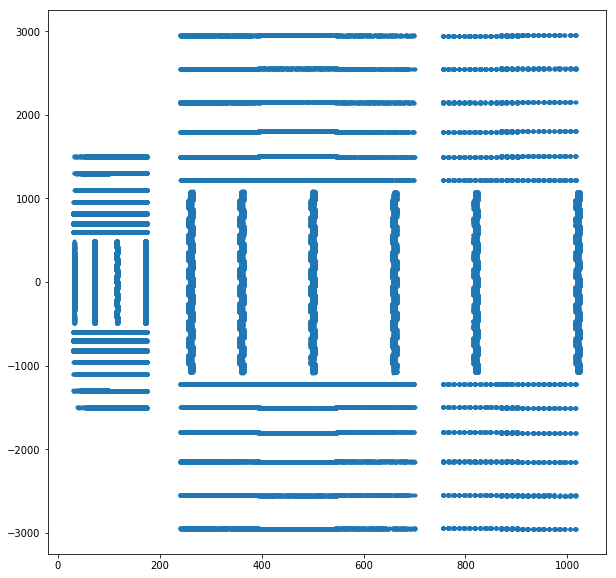

In [36]:
fig = plt.figure(figsize=(10,10))
plt.scatter(hits.x2, hits.z2, marker='.')
plt.show()

In [44]:
truth = pd.merge(truth, particles, how='left', on='particle_id')
hits = pd.merge(hits, truth, how='left', on='hit_id')
hits.sort_values(['particle_id','z'],inplace=True)

In [45]:
hits = hits[hits.particle_id != 0]

In [46]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,z2,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
28088,28089,21.437799,-23.006300,144.298004,8,2,150,31.446289,144.298004,4503668346847232,21.433201,-23.010500,144.309006,45.636002,-48.446098,309.656006,0.000058,0.000345,-0.014204,0.031768,45.863499,-49.721199,309.420013,-1.0,11.0
28133,28134,23.006100,-24.680599,154.983994,8,2,151,33.740372,154.983994,4503668346847232,23.006201,-24.680401,154.983002,45.892200,-48.552898,309.601013,0.000049,0.000345,-0.014204,0.031768,45.863499,-49.721199,309.420013,-1.0,11.0
37166,37167,49.240898,-51.415001,336.428986,8,4,364,71.191063,336.428986,4503668346847232,49.241798,-51.414101,336.420990,45.397598,-45.073002,310.199005,0.000040,0.000345,-0.014204,0.031768,45.863499,-49.721199,309.420013,-1.0,11.0
54115,54116,88.998802,-87.832100,598.000000,9,2,41,125.041046,598.000000,4503668346847232,88.986702,-87.844498,598.000000,46.606899,-40.401600,310.661987,0.000033,0.000345,-0.014204,0.031768,45.863499,-49.721199,309.420013,-1.0,11.0
57802,57803,103.483002,-100.477997,698.000000,9,4,41,144.237854,698.000000,4503668346847232,103.485001,-100.477997,698.000000,45.437302,-39.535301,310.946014,0.000027,0.000345,-0.014204,0.031768,45.863499,-49.721199,309.420013,-1.0,11.0


In [54]:
path_to_train = "../data/train_100_events"


for eps in [0.00075]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=1):

        # Track pattern recognition
        model = Clusterer2(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.3f}, Mean score: {1:.6f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.001, Mean score: 0.000000


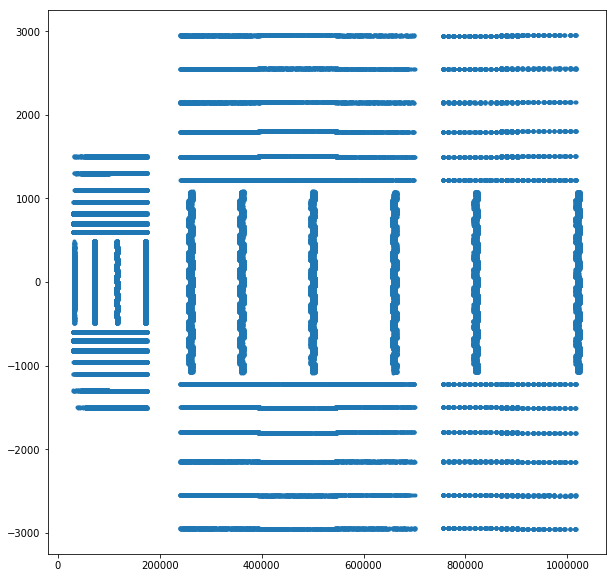

In [65]:
fig = plt.figure(figsize=(10,10))
plt.scatter(hits.x2 * 1000, hits.z2, marker='.')
plt.show()

In [56]:
print(labels)

[     0      1      2 ... 120416 120417 120418]


In [57]:
len(np.unique(labels))

120419

In [58]:
len(labels)

120939

In [59]:
len(hits)

120939

In [60]:
hits['track_id'] = labels

In [61]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,z2,track_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1,64.807045,-1502.5,0
1,2,-55.336102,0.635342,-1502.5,7,2,1,55.339748,-1502.5,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1,83.838287,-1502.5,2
3,4,-96.109100,-8.241030,-1502.5,7,2,1,96.461777,-1502.5,3
4,5,-62.673599,-9.371200,-1502.5,7,2,1,63.370335,-1502.5,4


In [173]:
path_to_train = "../data/train_100_events"


for eps in [0.0075]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=1):

        # Track pattern recognition
        model = Clusterer3(eps=eps)
        truth = pd.merge(truth, particles, how='left', on='particle_id')
        hits = pd.merge(hits, truth, how='left', on='hit_id')
        hits.sort_values(['particle_id','z'],inplace=True)
        hits = hits[hits.particle_id != 0]
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.6f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0075, Mean score: 0.000618


In [174]:
hits['track_id'] =labels

In [175]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits,r,y2,x2,z2,theta,track_id
113564,113565,-1010.729980,125.906998,-861.799988,17,4,454,4503668346847232,-1010.739990,125.904999,-862.786011,-0.120391,-0.286054,-0.203332,0.000011,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,6.926127,0.123615,-0.992330,-861.799988,3.017661,0
87264,87265,-303.845001,396.164001,-325.200012,13,6,613,4503668346847232,-303.834015,396.170013,-325.032013,-0.288603,0.130892,-0.198512,0.000009,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,6.213141,0.793491,-0.608582,-325.200012,2.225069,1
80880,80881,-176.988998,315.605988,-231.559998,13,4,495,4503668346847232,-177.020004,315.593994,-231.375000,-0.246460,0.210003,-0.201005,0.000005,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,5.891218,0.872212,-0.489129,-231.559998,2.081887,2
73762,73763,-105.031998,240.365997,-166.699997,13,2,353,4503668346847232,-105.022003,240.369003,-166.449005,-0.200451,0.254855,-0.201860,0.000005,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,5.569534,0.916337,-0.400409,-166.699997,1.982759,3
42237,42238,-54.560600,162.824997,-108.476997,8,8,453,4503668346847232,-54.559299,162.826004,-108.474998,-0.151918,0.287370,-0.204184,0.000008,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,5.145884,0.948183,-0.317724,-108.476997,1.894125,4


In [166]:
hits['theta'] = np.degrees(np.arctan2(hits['y2'], hits['x2']))

In [176]:
hits.head(20)

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits,r,y2,x2,z2,theta,track_id
113564,113565,-1010.729980,125.906998,-861.799988,17,4,454,4503668346847232,-1010.739990,125.904999,-862.786011,-0.120391,-0.286054,-0.203332,0.000011,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,6.926127,0.123615,-0.992330,-861.799988,3.017661,0
87264,87265,-303.845001,396.164001,-325.200012,13,6,613,4503668346847232,-303.834015,396.170013,-325.032013,-0.288603,0.130892,-0.198512,0.000009,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,6.213141,0.793491,-0.608582,-325.200012,2.225069,1
80880,80881,-176.988998,315.605988,-231.559998,13,4,495,4503668346847232,-177.020004,315.593994,-231.375000,-0.246460,0.210003,-0.201005,0.000005,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,5.891218,0.872212,-0.489129,-231.559998,2.081887,2
73762,73763,-105.031998,240.365997,-166.699997,13,2,353,4503668346847232,-105.022003,240.369003,-166.449005,-0.200451,0.254855,-0.201860,0.000005,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,5.569534,0.916337,-0.400409,-166.699997,1.982759,3
42237,42238,-54.560600,162.824997,-108.476997,8,8,453,4503668346847232,-54.559299,162.826004,-108.474998,-0.151918,0.287370,-0.204184,0.000008,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,5.145884,0.948183,-0.317724,-108.476997,1.894125,4
35620,35621,-31.189100,112.045998,-73.205704,8,6,302,4503668346847232,-31.188400,112.045998,-73.201897,-0.118230,0.302181,-0.206065,0.000010,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,4.756224,0.963373,-0.268164,-73.205704,1.842283,5
29322,29323,-16.957899,71.002403,-45.639400,8,4,218,4503668346847232,-16.962099,71.000504,-45.638100,-0.096428,0.311619,-0.204427,0.000014,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,4.290451,0.972644,-0.232302,-45.639400,1.805240,6
20879,20880,-6.369360,31.603201,-20.085800,8,2,109,4503668346847232,-6.373050,31.601900,-20.080000,-0.074873,0.319162,-0.203232,0.000018,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,3.473166,0.980289,-0.197569,-20.085800,1.769674,7
23345,23346,-28.038099,14.238300,59.595200,8,2,127,4503737066323968,-28.037800,14.238900,59.594200,-0.939812,0.487721,2.009650,0.000026,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1.0,11.0,3.448278,0.452783,-0.891621,59.595200,2.671709,8
31386,31387,-63.948002,33.432301,136.875000,8,4,286,4503737066323968,-63.946899,33.435398,136.884995,-0.927717,0.509620,2.009250,0.000022,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1.0,11.0,4.278886,0.463308,-0.886197,136.875000,2.659868,9


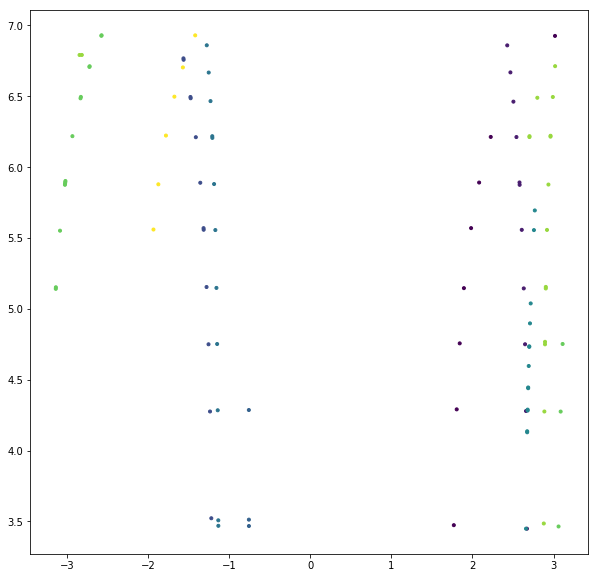

In [178]:
fig = plt.figure(figsize=(10,10))
hits1 = hits.head(100)
plt.scatter(hits1.theta, hits1.r, marker='.', c=hits1.particle_id)
plt.show()

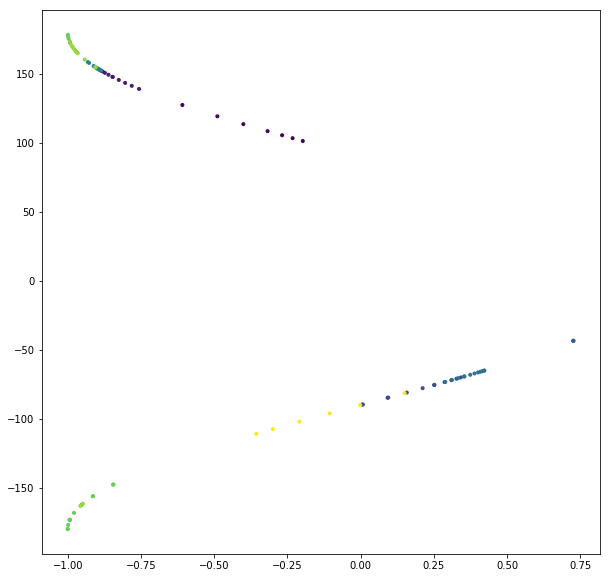

In [169]:
fig = plt.figure(figsize=(10,10))
plt.scatter(hits1.x2, hits1.theta, marker='.', c=hits1.particle_id)
plt.show()

In [170]:
path_to_train = "../data/train_100_events"


for eps in [0.0075]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=1):

        # Track pattern recognition
        model = Clusterer3(eps=eps)
        truth = pd.merge(truth, particles, how='left', on='particle_id')
        hits = pd.merge(hits, truth, how='left', on='hit_id')
        hits.sort_values(['particle_id','z'],inplace=True)
        hits = hits[hits.particle_id != 0]
        hits1 = hits.head(100)
        labels = model.predict(hits1)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits1, labels)
        score = score_event(hits1, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0075, Mean score: 0.00000000


In [97]:
??DBSCAN

In [123]:
path_to_train = "../data/train_100_events"


for eps in [0.0075]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=1):

        # Track pattern recognition
        model = Clusterer4(eps=eps)
#         truth = pd.merge(truth, particles, how='left', on='particle_id')
#         hits = pd.merge(hits, truth, how='left', on='hit_id')
#         hits.sort_values(['particle_id','z'],inplace=True)
#         hits = hits[hits.particle_id != 0]
#         hits1 = hits.head(100)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0075, Mean score: 0.00126704


In [125]:
truth = pd.merge(truth, particles, how='left', on='particle_id')
hits = pd.merge(hits, truth, how='left', on='hit_id')
hits.sort_values(['particle_id','z'],inplace=True)

In [128]:
hits1 = hits[hits.particle_id != 0].head()

In [131]:
hits1['r'] = np.sqrt(hits1['x'] ** 2 + hits1['y'] ** 2)
hits1['rho'] = np.sqrt(hits1['x'] ** 2 + hits1['y'] ** 2 + hits1['z'] ** 2)

In [132]:
hits1

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits,r,rho
113564,113565,-1010.729980,125.906998,-861.799988,17,4,454,-0.757547,0.094368,304.716492,4503668346847232,-1010.739990,125.904999,-862.786011,-0.120391,-0.286054,-0.203332,0.000011,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,1018.541931,1334.213989
87264,87265,-303.845001,396.164001,-325.200012,13,6,613,-0.509946,0.664886,149.128799,4503668346847232,-303.834015,396.170013,-325.032013,-0.288603,0.130892,-0.198512,0.000009,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,499.267151,595.837830
80880,80881,-176.988998,315.605988,-231.559998,13,4,495,-0.411990,0.734659,107.913750,4503668346847232,-177.020004,315.593994,-231.375000,-0.246460,0.210003,-0.201005,0.000005,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,361.845612,429.595490
73762,73763,-105.031998,240.365997,-166.699997,13,2,353,-0.337941,0.773379,78.058067,4503668346847232,-105.022003,240.369003,-166.449005,-0.200451,0.254855,-0.201860,0.000005,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,262.311890,310.799652
42237,42238,-54.560600,162.824997,-108.476997,8,8,453,-0.268618,0.801636,50.885246,4503668346847232,-54.559299,162.826004,-108.474998,-0.151918,0.287370,-0.204184,0.000008,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1.0,8.0,171.723145,203.115967


In [144]:
path_to_train = "../data/train_100_events"


for eps in  [0.035]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=1):

        # Track pattern recognition
        model = Clusterer5(eps=eps)
        truth = pd.merge(truth, particles, how='left', on='particle_id')
        hits = pd.merge(hits, truth, how='left', on='hit_id')
        hits = hits.fillna(0)
        hits.sort_values(['particle_id','z'],inplace=True)
#         hits = hits[hits.particle_id != 0]
#         hits1 = hits.head(100)
        
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(hits, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0350, Mean score: 0.01685268
